4423680/4422102 [==============================] - 0s 0us/step


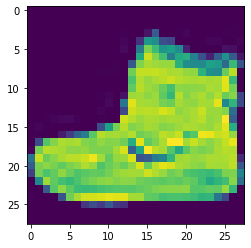

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

plt.imshow(train_images[0])
train_images = train_images / 255.0
test_images = test_images / 255.0

In [16]:
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [2]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5022 - accuracy: 0.8238
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3760 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3349 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3124 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.8893


In [4]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3456 - accuracy: 0.8768


[0.34556230902671814, 0.876800000667572]

In [8]:
y_pred = np.argmax(np.round(model.predict(test_images)), axis = 1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [11]:
y_real = test_labels
y_real

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [12]:
miss = np.where(y_real != y_pred)[0]
miss

array([  12,   17,   23, ..., 9979, 9989, 9991], dtype=int64)

In [13]:
miss.shape

(1389,)

In [14]:
dic1 = {0 : 'T-shirt/top',1 : 'Trouser',2 : 'Pullover' , 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal',
        6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle boot'}
dic1[0]

'T-shirt/top'

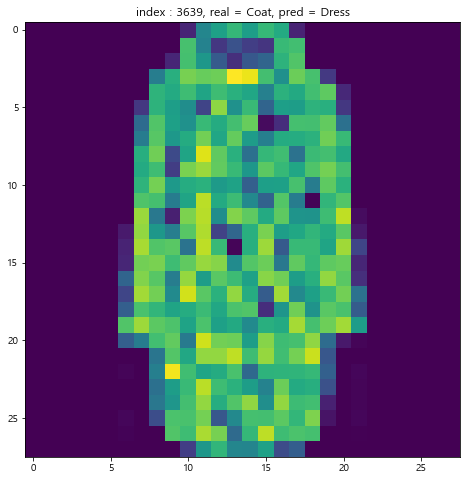

In [33]:
i = np.random.choice(miss)
plt.figure(figsize = (8, 8))
plt.imshow(test_images[i])
plt.title("index : {}, real = {}, pred = {}".format(i, dic1[y_real[i]], dic1[y_pred[i]]))
plt.show()

In [22]:
1 - (miss.shape[0] / test_images.shape[0])

0.8611

### 컨벌루션 신경망을 구축

(60000, 28, 28)
(10000, 28, 28)


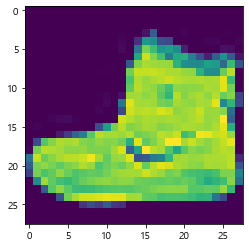

In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

plt.imshow(train_images[0])

print(train_images.shape)
print(test_images.shape)

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images / 255.0


In [24]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.5002 - accuracy: 0.8164
Epoch 2/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.3199 - accuracy: 0.8825
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2727 - accuracy: 0.8992
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2438 - accuracy: 0.9104
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.2597 - accuracy: 0.9050
정확도: 0.9049999713897705


In [34]:
print('정확도:', test_acc)
print('loss:', test_loss)

정확도: 0.9049999713897705
loss: 0.25971344113349915


In [38]:
y_pred = np.argmax(np.round(model.predict(test_images)), axis = 1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [40]:
y_real = test_labels
y_real

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [42]:
miss = np.where(y_real != y_pred)[0]
miss

array([  12,   23,   25, ..., 9977, 9981, 9991], dtype=int64)

In [43]:
test_images.shape

(10000, 28, 28, 1)

In [45]:
test_img = test_images.reshape(10000, 28, 28)
test_img.shape

(10000, 28, 28)

In [46]:
dic1 = {0 : 'T-shirt/top',1 : 'Trouser',2 : 'Pullover' , 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal',
        6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle boot'}
dic1[0]

'T-shirt/top'

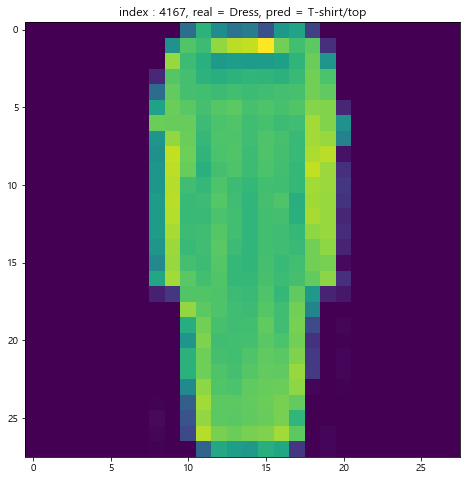

In [60]:
i = np.random.choice(miss)
plt.figure(figsize = (8, 8))
plt.imshow(test_img[i])
plt.title("index : {}, real = {}, pred = {}".format(i, dic1[y_real[i]], dic1[y_pred[i]]))
plt.show()

In [62]:
1 - miss.shape[0] / test_images.shape[0]

0.8979